<hr style="border:0.2px solid black"> </hr>

<figure>
  <IMG SRC="ntnu_logo.png" WIDTH=250 ALIGN="right">
</figure>

**<ins>Course:</ins>** TVM4174 - Hydroinformatics for Smart Water Systems

# <ins>Project:</ins> WNTR Educational Notebook
    
*Developed by Christian Skagsoset and Joakim Skjelde*

<hr style="border:0.2px solid black"> </hr>


# Introduction

This Notebook is developed as a project assignment in the course `TVM4174: Hydroinformatics for smart water systems` at NTNU. 
The Notebook is meant to be used to get familiar and practise your skills in using the WNTR-package in Python. 
The tasks in this Notebook is created based on what the students are using in exercises in the following courses at NTNU:
* `TVM4130: Urban Water Systems`
* `TVM4174: Hydroinformatics for Smart Water Systems`



# Prerequisites
The use of this Notebook requires a relatively good knowledge in Python programming, with packages as Pandas, Matplotlib and Numpy, since all these packages will be used in this Notebook.

If you are a bit rusty in the usage of Python in general, or some of the packages, we recommend looking through the Notebooks of Professor Mark Bakker from TU Delft. These Notebooks contains short lecture videos, theory and exercises with different degree of difficulty.
It's recommended to do the following Notebooks from Professor Bakker before trying out this `WNTR-Notebook`:
* Notebook 1 - Basics and plotting
* Notebook 2 - Arrays
* Notebook 3 - For loops and If/Else statements
* Notebook 4 - Functions
* Notebook 8 - Pandas and Time Series

The following hyperlink leads you to the webpage of [Professor Bakker's Notebooks](https://mbakker7.github.io/exploratory_computing_with_python/)



# Structure of Notebook
The Notebook switches between introduction of how to operate the `WNTR-package` and the task for you to put theory into practice. The important info to solve each task is given with examples in advance, which should make you able to solve the different tasks. In some of the tasks you will need the knowledge of the different `Python-packages` mentioned above, which will be a bit more challenging.

## What is EPANET and WNTR?
#### EPANET
EPANET was developed by Lewis Rossman, for the United States Environmental Protection Agency (US EPA), in the early 90s, and is a software used to model water distribution systems. The program is public domain and has an open-source code, making it popular in use. The program can perform hydraulic modelling, water quality modelling and resilience modelling, making it robust and useful in many cases for engineers. For the case of this notebook, the focus is hydraulic modelling. For further info about the program, the following webpages are recommended:
* [US EPA](https://www.epa.gov/water-research/epanet)
* [EPANET Documentation](https://epanet22.readthedocs.io/en/latest/index.html) 
* [EPANET.no](https://epanet.no/)

#### WNTR
WNTR(Water Network Tool for Resilience) is a Python package used to simulate and analyze the resilience of water network systems. The package is based on EPANET, and can in principal do everything EPANET can, and a lot more. The package is very efficient together with other Python packages to perform calculations, analyzes and visualizations of the water network. In this Notebook, you will experience a whole range of the performances and capabilities of the package, but there is alot more to discover for those of interest. The following links is very useful and educational to use when exploring the package.
* [WNTR Documentation](https://wntr.readthedocs.io/en/latest/overview.html)
* [WNTR GitHub](https://github.com/USEPA/WNTR)



# The EPANET input-file

To run a model in EPANET, or WNTR, we need an input-file, called INP-file. This file contains all attributes to run the model in the software, with nodes, links, patterns and hydraulic options to mention some. 

It is also possible to make your own model in both EPANET and WNTR, but this will be shown later in the Notebook. 

## Installing and importing the WNTR-package
To use the WNTR-package, we need to install it and import it. In Jupyter Notebooks you normally have to install the package for every time you use a different Notebook. If you are using an IDE for your programming, it is normally enough to install the file once, and then being able to use it further. 
The good thing is that you usually get an error message if you try to import the package without it being installed.

In [1]:
# Installing the wntr-package
# The normal installing method in Python is using the pip-install function
!pip install wntr

  Using cached wntr-0.4.1-py3-none-any.whl (4.4 MB)


In [2]:
# Importing the package
import wntr

# We also need to use other python packages, so we import the most relevant ones.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

## Importing the INP-file

To start working on a nettwork you have to import the network from a EPA-Net input file and store it as a variable. This variable is normaly stored as wn, short for water network. This is the variable that you normally work, you can also use this variable to overwrite or create a new input file whenever you want. In the examples of the Notebook, we will use the Net1-network, for the exercise you will use the Net3-network.

More information about importing the system: [Getting Started](https://wntr.readthedocs.io/en/latest/getting_started.html)


Before doing any work to on a network, it would be handy to check if you have imported the correct network and to see what the system consists of. To plot the newly imported network, you can use the function: `wntr.graphics.plot_network`

Check out [Network](https://wntr.readthedocs.io/en/latest/graphics.html#networks) for more information about `wntr.graphics.plot_network`

To see what the system consists of you can use: `wn.describe`, [Describe](https://wntr.readthedocs.io/en/latest/apidoc/wntr.network.model.html?highlight=describe#wntr.network.model.WaterNetworkModel.describe)

<AxesSubplot:>

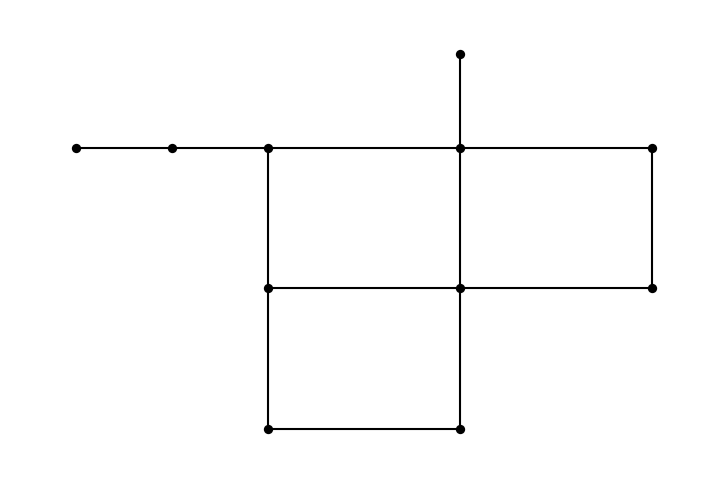

In [3]:
# Assigning the INP-file to a variable
input_file = 'Net1_project.inp'

# Using the above variable in the wntr command to create a network model. Usually we give the network the name wn(water network)
wn = wntr.network.WaterNetworkModel(input_file)

# To check if you actually have a model now, you can plot the network.
wntr.graphics.plot_network(wn)

## Check and change units
EPANET can operate with both US-customary and SI-based units. We would like our model to run with SI-units, so we need to check which units the network is set to now, to see if we need to change anything.

In [4]:
# Checking the current units of the input file
wn.options.hydraulic.inpfile_units

'GPM'

The units is set to GPM (gallons per minute), but we want it in LPS (litre per second). To change this, we could use wntr to write a new input file in the unit type that we want. Using the function `wn.write_inpfile` we can set the units to LPS and the whole input file will change according to it.

[Units](https://wntr.readthedocs.io/en/latest/units.html)

[Write a model to an input file](https://wntr.readthedocs.io/en/latest/waternetworkmodel.html#write-a-model-to-an-inp-file)

<AxesSubplot:>

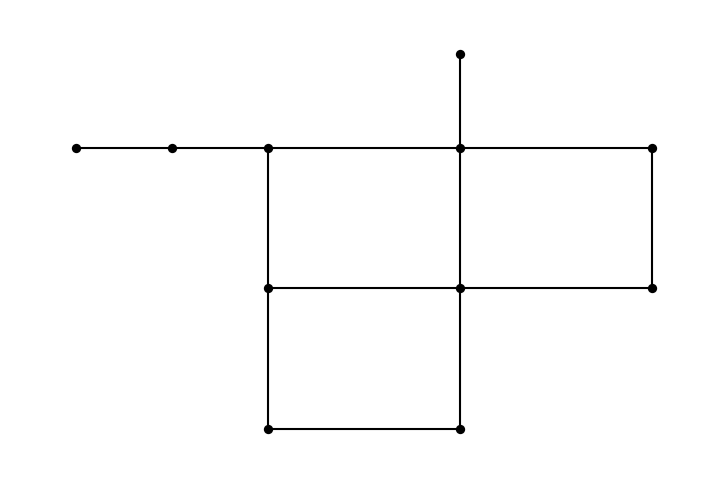

In [5]:
# Changing the units
wn.options.hydraulic.inpfile_units = 'LPS'

# Writing a new INP-file, to do the convertion
wn.write_inpfile('Net1_project_SI.inp', version=2.2)

# Doing the same procedure as above, and assignning the new INP-file to a variable, to use when creating the model.
input_file = 'Net1_project_SI.inp'
wn = wntr.network.WaterNetworkModel(input_file)

# Plotting the network to check if the model looks ok
wntr.graphics.plot_network(wn)

# Task 1 Loading EPANET-file
In this task, the goal is to load the EPANET input-file, and create the network model for use in the coming tasks.
The task is divided into:
* Install and import the `wntr-package`
* Import and assign the EPANET input-file
* Plot results from the simulation

### Task 1a: Installing wntr and importing
Perform the following tasks:
* Install the `wntr-package` (it should already be installed from the examples above)
* Import the `wntr-package`
* Import other relevant packages

### Task 1b: Importing and assigning the input file
Perform the following tasks:
* Import the EPANET input-file (INP-file)
* Assing the input-file to create a Network model

### Task 1c: Change the units from US-customary to SI-based
Perform the following tasks:
* Check the units for the Hydraulics of the model
* Change the units from US-customary to SI-based
* Import and assign the new input-file

# Query attributes
The query function is a helpfull tool when you are searching for objects attributes. This could be the elevation of the nodes or the rougnesses of the pipes. You could also find the lowest or highest values within a attribute if you make it into a pandas series and utilize the `.ixmax()` or `.ixmin()` function. It is also possible to use the built in functions to find the sum of the attribute values. 

[Query element attributes](https://wntr.readthedocs.io/en/latest/waternetworkmodel.html#query-element-attributes)

[Pandas: Idmax](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmax.html#pandas.Series.idxmax)


In [6]:
node_name = wn.query_node_attribute('name')
print(node_name)

link_length = wn.query_link_attribute('length')
print(link_length.sum())

10    10
11    11
12    12
13    13
21    21
22    22
23    23
31    31
32    32
9      9
2      2
dtype: object
19363.944000000003


# Color mapping

You can also plot the network with the attributes of your choosing. If you would like the nodes in the plot to be colored accordning to the scale of the demand, elevation or head, you can just query the attribute and set it as the `node_attribute` parameter in `wntr.graphics.plot_network`. To decide what color scheme this should be in you can just write the name of the color scheme in to the `node_cmap` parameter. The names of the different color schemes can be found here: [Color maps](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)



For the links its a bit more complicated. you will have to import the color scheme instead of just typing the name of the color scheme. Use `plt.cm.COLOR` to import the scheme that you want to use in the `link_cmap` parameter.

Documentation for network plotting: [Network](https://wntr.readthedocs.io/en/latest/graphics.html#networks)


# Find attributes for spesific elements
`wn.get_node(nodename)` and `wn.get_link(linkname)`can be used to to find the different attributes for a given node or link. This can be usefull if you just want to look up the elevation or coordinates for a single element at a time. Coordinates are returned as a tuple with x and y values.


In [8]:
print(wn.get_node('10').coordinates)
print(wn.get_link('10').length)

(20.0, 70.0)
3209.544


# Task 2 Plotting water network
In this task, the goal is to plot the water network, and perform some statistical analysis on some of the network attributes.
The task is divided into:
* Finding the node attributes
* Finding the link attributes
* Plotting the network with different attributes

### Task 2a: Finding node attributes: elevation, names, demand
Perform the following tasks:
* Find the elevation and name of the highest node
* Find the demand at the highest node
* Make a print of the name of the highest node


### Task 2b: Findig link attributes: diameter, lenght, coordinates of link
Perform the following tasks:
* Query the diameters of the pipes
* Calculate and make a print of the mean pipe diameter

### Task 2c: Plotting the network with attributes and color map (links and nodes)
Perform the following tasks:
* Choose a colormap to use for the attributes of the network. "Unlimited" colormaps can be found at ([Matplotlib_Colormaps](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)).
* Plot the network with elevation as node attribute and diameter as link attribute
* Mark the node with highest elevation, using a star as the marker

Remember to have a title on the network, and attribute labels

## Running a steady-state simulation in WNTR
With a steady state simulation, the system is observed at a specific point in time or under steady-state conditions (flow rates and hydraulic grades remain constant over time). This analysis is useful to determine the network behaviour during minimum, maximum or average flowrates ([Bentley WaterGEMS CONNECT](https://docs.bentley.com/LiveContent/web/Bentley%20WaterGEMS%20SS6-v1/en/GUID-F61F2CDD6AFD4451B0C56A18708E806A.html)). 
When doing analysis in EPANET and WNTR, we need to choose which demand model we want to use for the simulation. The choice is between `Demand Driven Analysis (DDA)` and `Pressure Driven Analysis (PDA)`. The two analyze methods is quite different, so be sure on which one you are using when. We will use the DDA-method in this Notebook. 

If you want to learn more about the different types of analysis, check this link: [EPANET Documentation](https://epanet22.readthedocs.io/en/latest/8_analyzing_network.html)

In WNTR we also have two choices for the 

In [9]:
# Choose the type of solver you want to use, here we will use Demand Driven.
wn.options.hydraulic.demand_model = 'DDA'

# Running a simulation
# We usually call the simulation variable sim for simplicity, but you could in theory call it whatever you want.
# 
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

All the results from the simulation is now stored in the variable named `results`. For us to do analyzes or visualize the results, we need to extract the data we need. 

## Showing the results from the simulation
Now we want to look at the results from the steady-state simulation above. Let' look at the DataFrame of the pressure in the nodes. The different results is mainly divided into results for the links and results for the nodes. We need to specify if the result we want to obtain is at a link or in a node. It's also important to write the correct name of the result you want, like 'pressure' or 'flowrate' etc, so it's recommended that you get familiar with the names EPANET and WNTR are using. 

In [10]:
# Making a variable to store the pressure from the results.
# Since pressure is a node result, we need to specify that we want to collect results from the nodes.
# We then specify that we want the pressure.
pressure = results.node['pressure']

# Using the Pandas function display() to get a better print of the results
display(pressure)

name,10,11,12,13,21,22,23,31,32,9,2
0,89.716995,83.890175,82.317284,83.476395,82.76741,83.539085,84.931061,81.500977,77.934128,0.0,36.576


In the DataFrame above, the row shows the timestep of the simulation, which is zero in our case due to the fact that it is a steady-state simulation, and we are only looking into one timestep. The columns shows the different nodes. 
If we want to have the nodes as rows and the timestep as columns (useful for extended-period simulation results and plotting), we can transpose the DataFrame.

In [11]:
# Transposing the DataFrame to get nodes as rows, and timestep as column, using the .T function
pressure_transposed = pressure.T
display(pressure_transposed)

,0
name,
10,89.716995
11,83.890175
12,82.317284
13,83.476395
21,82.767410
22,83.539085
23,84.931061
31,81.500977
32,77.934128


## Plotting simulation results 
It is possible to plot the values of DataFrames, meaning that we can get some good visualisations of our results. Lets make a plot of the simulated pressures, having the nodes on the x-axis, and the pressure on the y-axis.

NB! Remember to always have axis names, legends, titles and units on the plot, enough to make it clear what the plot is showing us.

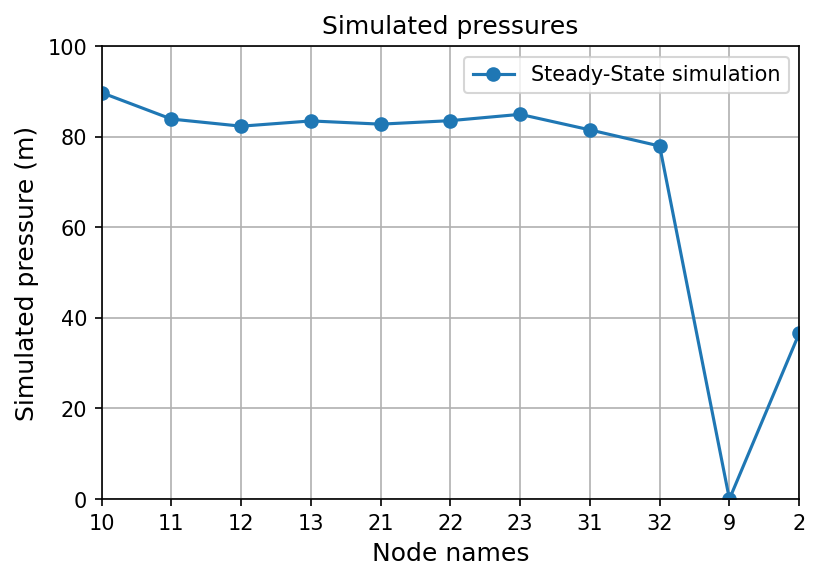

In [12]:
# Creating a list with all the node names, to use when plotting.
node_names = []
for i in range(0, 11):
    node_names.append(pressure.T.index[i])

plt.plot(node_names, pressure.T, marker='o', label='Steady-State simulation')
plt.title('Simulated pressures')
plt.legend()
plt.grid()
plt.xlabel('Node names', fontsize=12)
plt.ylabel('Simulated pressure (m)', fontsize=12)
plt.xlim(0, len(node_names) - 1)
plt.ylim(0, 100);

# We could also use the Pandas function .plot(), to easily plot the pressure results. 
# Try it yourself!
# pressure.T.plot(title='Steady-State simulation')

To get a even better view of the network, we can plot the water network model, and use our simulation results as attributes. This way we can see where the nodes from the plot above are located in the network.

<AxesSubplot:title={'center':'Steady-State simulation'}>

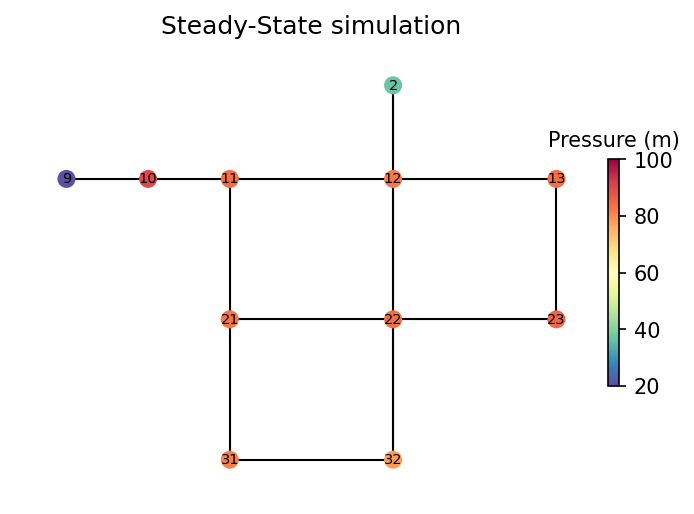

In [13]:
# Plotting the network, showing pressure at the nodes, with a range from 20 m to 100 m.
wntr.graphics.plot_network(wn, node_attribute=pressure.loc[0,:],
                           title='Steady-State simulation',
                           node_size=75,
                           node_range=[20, 100],
                           node_colorbar_label='Pressure (m)',
                           node_labels=node_names
                          )

# Task 3 Simulating water network
In this task, the goal is to run the first simulation of the network. The task is divided into:
* Running the simulation
* Show results from the simulation
* Plot results from the simulation



### Task 3a Steady state simulation
Perform the following tasks:
* Run the simulation, using the EpanetSimulator and a demand-driven simulation
* Store the resulting simulation in a variable with a suitable name

### Task 3b Show simulation results
Perform the following tasks:
* Display a Pandas Dataframe with the simulated Flowrate at the links
* Display a Pandas Dataframe with the simulated Velocity at the links
* Display a Pandas Dataframe with the simulated Pressures at the nodes

### Task 3c Plotting the results and the network
Perform the following tasks:
* Make plots of the simulation results from the previous task (Task 3b), having the link/node-names on the x-axis and the simulated results on the y-axis
* Plot the network with pressure as node attribute and flowrate as link attribute

# Finding single attributes

It might be usefull to change different attributes within your nettwork, either to calibrate the nettwork or to see what the changes could do to your nettwork. Some examples of these attributes are demand, dimension, pipe roughness or initial status. To do changes to the attributes you will have to use `wn.get_link` or `wn.get_node` in a simmilar method as shown in the example below.


In [14]:
# Set a new value for the roughness
pipe = wn.get_link('10')
pipe.roughness = 130
print(pipe.roughness)

130


It is also possible to be more precise when you are using the query function. You can define what kind of element type that you want to query and you can use numpy functions to define what values you would like to query. Which could be usefull to find all the pipes with a lenght greater than, lower than or equal to a given value. Instead of including every link, like the valves and pumps you can set `link_type = wntr.network.model.Pipe`


[Query documentation](https://wntr.readthedocs.io/en/latest/waternetworkmodel.html#query-element-attributes)

Another important thing to note while you are changing the attributes, is that you can itterate trough the pipes and change every pipe with a for loop that itterates over `wn.pipes()`, you could eg. change the roughnesses for all the pipes.

[Itterate over elements](https://wntr.readthedocs.io/en/latest/waternetworkmodel.html#iterate-over-elements)

# Task 4 Change attributes

In this task, the goal is to do some changes to the attributes of the network, and see how it affects the behaviour of the system. The task is divided into:
* Running the simulation
* Show results from the simulation
* Plot results from the simulation

### Task 4a: Change dimension of some pipes
Perform the following tasks:
* Query how many pipes that has a dimension less than 350 mm
* Change the diameter of all pipes with diameter less than 350mm, to a diameter of 350mm
* Do a check to see if there is still any pipes with diameter lower than 350mm.

### Task 4b: Change initial status of some links
Perform the following tasks:
* Check if there are any pipes with status set to 'closed' in the network
* There is schedueld a maintenance on link "335", so you will have to close this link
* Open the initialy closed pipe that you found


### Task 4c: Run steady-state simulations with changed attributes
Perform the following tasks:
* Simulate the nettwork with the maintenance going on and plot the results

## Running an extended-period simulation in WNTR
When running an extended-period simulation, we need some more input than with a steady-state simulation. To be able to create timesteps with different demands throughout a specific time, we need to add demand patterns to the nodes of the system. 

## Check and modify patterns in the model
We can check if there is any existing patterns in the system by using the `wn.pattern_name_list` function.

In [15]:
# Making a variable containing all patterns of the system.
patterns_network = wn.pattern_name_list

# Making a print to show how many patterns we have and what they are called
print(f'We got {len(patterns_network)} pattern with the name {patterns_network}')

We got 1 pattern with the name ['1']


It is possible to add new patterns, which will be done in task 6. We will make a new multiplier to the excisting pattern in the system. 

We will make a pattern of a 6 hour cycle throughout a whole day, which results in 4 numbers in the multiplier. 

In [16]:
# Making a variable out of the pattern name, based on the results
# in the codecell above.
pattern = wn.patterns.get('1')

# Creating a multiplier to use in the pattern
pattern_multiplier = [1, 1.4, 1.8, 1.2]

# Changing from the excisting multiplier to the new multiplier
# by using the .multipliers function.
pattern.multipliers = pattern_multiplier

# Collecting the patterns to check that we have the correct multiplier.
wn.patterns.get('1')

<Pattern '1', multipliers=array([1. , 1.4, 1.8, 1.2])>

## Check and modify timesteps in the model 
To be able to get the timesteps we want from the simulation, we need to check and change the timesteps in the model. Start by writing `wn.options.time` and press `tab` to see which timestep options there is in the model.

We need to modify `report_timestep`, `pattern_timestep` and `duration` to get the wanted timesteps in the simulation. Remember that time is given in seconds!

In [17]:
# Setting the timestep to correspond to 6 hour cycles
wn.options.time.report_timestep = 3600 * 6
wn.options.time.pattern_timestep = 3600 * 6

# Setting the total duration of the simulation, 24 hours
wn.options.time.duration = 3600 * 24

Now everything is set to run the extended period simulation. As seen from above, the difference from a steady-state simulation is the patterns and timesteps. 
Below we will run the simulation.

In [18]:
# Setting the hydraulic demand model, demand-driven in this case
wn.options.hydraulic.demand_model = 'DDA'

# Running the simulation
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

# Extracting the pressure results from the simulation
sim_pressure = results.node['pressure']

# Changing the time unit from seconds to hours in the DataFrame 
sim_pressure.index = sim_pressure.index / 3600
display(sim_pressure)

name,10,11,12,13,21,22,23,31,32,9,2
0.0,87.870247,84.130272,82.319572,83.488579,82.855148,83.563293,84.951370,81.574089,77.986443,0.0,36.576000
6.0,91.933846,88.537071,87.886559,88.466209,86.980774,88.220863,89.584824,84.871597,81.190002,0.0,42.163418
12.0,75.449310,75.449310,79.886772,79.232094,75.876167,77.750641,79.162315,72.693329,68.844116,0.0,34.290279
18.0,85.145370,81.176704,79.348198,80.286133,79.405479,80.277893,81.643875,77.722122,74.072670,0.0,33.612442
24.0,89.141365,85.508476,83.861412,85.023651,84.338181,85.090172,86.480934,83.067230,79.493958,0.0,38.119423


Now we can plot the results we want to visualize.

(0.0, 24.0)

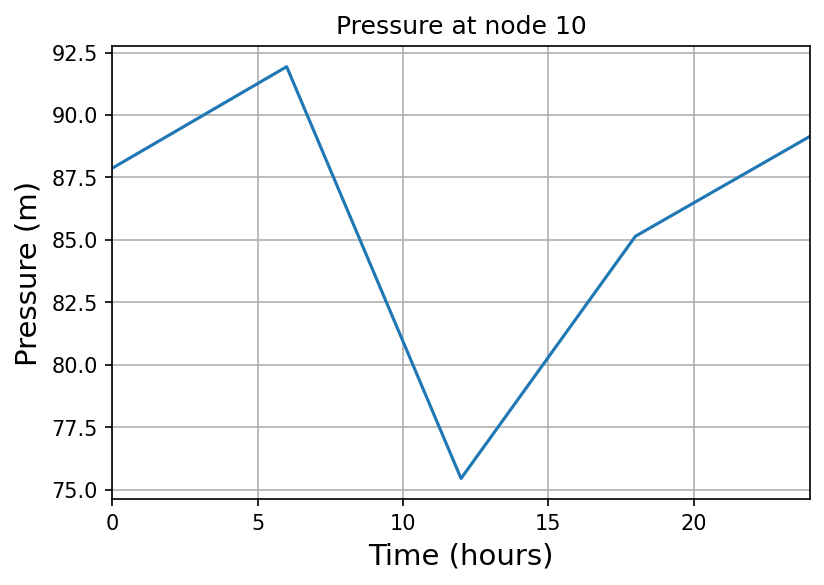

In [19]:
# Plotting the pressure in one of the nodes
sim_pressure['10'].plot()
plt.grid()
plt.xlabel('Time (hours)', fontsize=14)
plt.ylabel('Pressure (m)', fontsize=14)
plt.title('Pressure at node 10')
plt.xlim(0, 24)

# Task 5 Change and add patterns
In this task, the goal is to change and add demand patterns at the nodes. The task is divided into:

* Change a pattern by adding multipliers
* Perform an extended period simulation
* Plotting results of extended period simulation

### Task 5a: Change the existing pattern
Perform the following tasks:
* Find the existing pattern
* Add a multiplier to the existing pattern. Create a multiplier corresponding to a demand pattern of 2 hour intervals, for a total of 24 hours.

### Task 5b: Extended period simulation
Perform the following tasks:
* Check the pre-defined timesteps from the INP-file
* Change the report timestep and the pattern timestep to correspond with the demand pattern.
* Set the timesteps for the simulation
* Run the simulation with the `Demand Driven solver`
* Store the simulation results in a variable

### Task 5c: Showing results from the simulation
Perform the following tasks:
* Display the simulation results (pressure, demand) in a Pandas Dataframe
* Choose a node to use for the plots
* Plot the pressure for the period for the choosen node, with time on the x-axis and pressure on the y-axis
* Plot the demand for the periode for the choosen node, with time on the x-axis and demand on the y-axis

Remember to make a describing plot, with titles, labels and units.

# Task 6 Creating a network from scratch (Optional)

To fully understand how to modify your nettwork it could be handy to know how to make a nettwork from scratch. This can be done in a simple way. 

As mentioned above, you should initialy create a pattern such that you can do extended period simmulations. This can be done with `wn.add_pattern`. The next step in making your own nettwork is to add junctions. You can add junctions with `wn.add_junctions`. Instead of simply having a network with just junctions and demands, you could also add a water supply as reservoirs or tanks. To do this you can use a simmilar function to junctions `wn.add_reservoir` or `wn.add_tank`.

The path between the nodes is defined as links and could be set as either pipes, valves or pumps. This could be done with `wn.add_pipe`, where you decide what nodes it should connect between. If you want to further use this water nettwork, you could write this to a input file as mentioned in taks 1.

[Documentation on how to build a model](https://wntr.readthedocs.io/en/latest/waternetworkmodel.html#build-a-model-from-scratch)

NB! Remember that there is a difference between setting the demand in EPA-Net and in WNTR. EPA-Net demand is in $\frac{L}{s}$ and WNTR uses $\frac{M^3}{s}$


* Make a network with a minimum of 4 nodes and a watersupply with connections between them
* Write your network to a inputfile
* Try to open your file in EPA-Net

# Solutions to the tasks

## Task 1 Loading EPA-NET file

### Task 1a: Installing wntr and importing

In [42]:
!pip install wntr
import wntr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Task 1b: Importing and assigning the input file

{'Nodes': {'Junctions': 92, 'Tanks': 0, 'Reservoirs': 5},
 'Links': {'Pipes': 117, 'Pumps': 2, 'Valves': 0},
 'Patterns': 1,
 'Curves': {'Pump': 2, 'Efficiency': 0, 'Headloss': 0, 'Volume': 0},
 'Sources': 0,
 'Controls': 0}

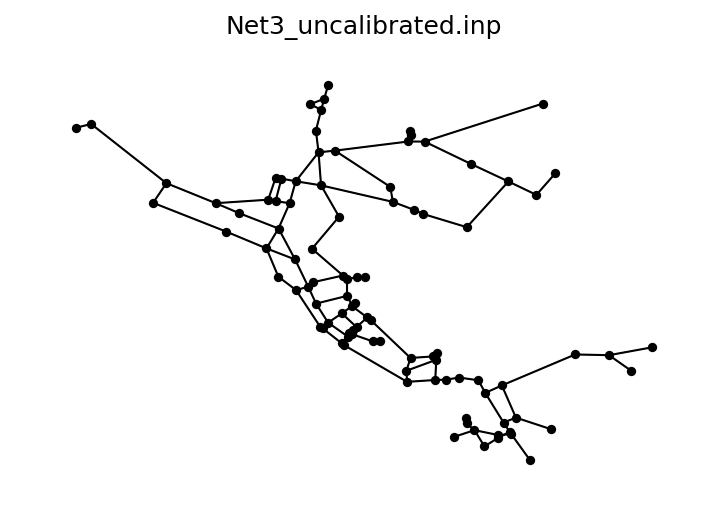

In [43]:
input_file = 'Net3_uncalibrated.inp'
wn = wntr.network.WaterNetworkModel(input_file)
wntr.graphics.plot_network(wn, title=wn.name)
wn.describe(level=1)

### Task 1c: Change the units from imperical to SI

In [44]:
wn.write_inpfile('Net3_changed_units.inp', version=2.2, units='LPS')
input_file = 'Net3_changed_units.inp'
wn = wntr.network.WaterNetworkModel(input_file)

## Task 2 Plotting water network

### Task 2a: Finding node attributes: elevation, names, demand

In [45]:
node_elevation = wn.query_node_attribute('elevation')
node_elevation = pd.Series(node_elevation)
highest_node = node_elevation.idxmax()
print('The name of the highest node is:', highest_node)

The name of the highest node is: 10



### Task 2b: Findig link attributes: diameter, roughness, lenght, coordinates of link

In [46]:
link_diameter = wn.query_link_attribute('diameter')
test_2 = link_diameter.mean()
print('The mean pipe diameter is', f'{test_2:.3f}','mm')

The mean pipe diameter is 0.425 mm


### Task 2c: Plotting the network with attributes and color map (links and nodes)

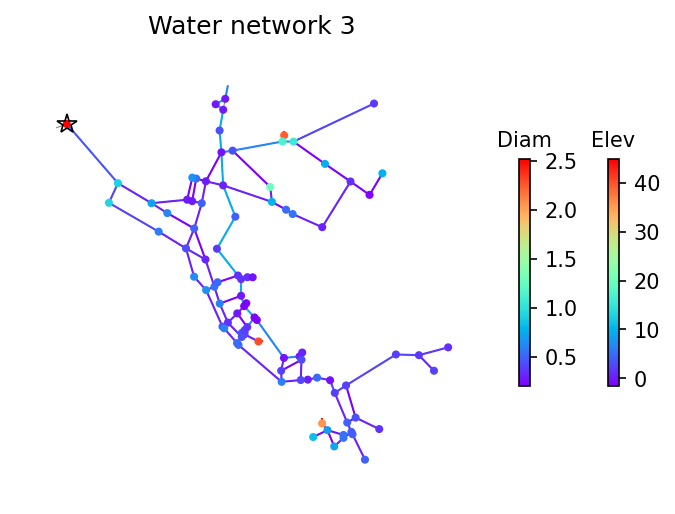

In [47]:
link_colormap = plt.cm.rainbow
wntr.graphics.plot_network(wn,
                          title='Water network 3',
                          node_size=15,
                          link_cmap=link_colormap,
                          node_cmap='rainbow',
                          node_attribute=node_elevation,
                          link_attribute=link_diameter,
                          link_colorbar_label='Diam',
                          node_colorbar_label='Elev');



n = wn.get_node(highest_node)
x, y = n.coordinates
plt.plot(x,y, 'k*', markersize=10, markerfacecolor='None', markeredgewidth=0.8)
plt.show()

## Task 3 Simulating water nettwork

### Task 3a: Steady state simulation

In [48]:
# Choose the type of solver, demand-driven here
wn.options.hydraulic.demand_model = 'DDA'

# Running a simulation
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

### Task 3b: Show simulation results

In [49]:
# Flowrate in links
flowrate = results.link['flowrate']
display(flowrate)

# Veloctiy in links
velocity = results.link['velocity']
display(velocity)

# Pressure in nodes
pressure = results.node['pressure']
display(pressure)

name,20,40,50,60,101,103,105,107,109,111,...,317,319,321,323,325,329,330,333,10,335
0,-0.355713,-0.163153,-0.077753,0.767847,3.904976e-09,0.009225,-0.021209,0.005189,0.000822,-0.013777,...,-0.001329,0.038962,0.292669,0.056735,0.005231,0.767847,0.0,-3.219270e-08,0.0,0.767847


name,20,40,50,60,101,103,105,107,109,111,...,317,319,321,323,325,329,330,333,10,335
0,0.071626,0.032852,0.015656,2.630829,2.378558e-08,0.071118,0.290673,0.071113,0.006335,0.188818,...,0.040986,0.533974,0.641762,0.777552,0.161298,1.68373,0.0,7.059196e-08,0.0,0.0


name,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,River,Lake,1,2,3
0,4.873809,40.698139,8.839265,45.938995,3.992894,1.066805,63.730511,94.855171,94.855171,36.877808,...,43.363804,49.852459,47.952293,46.94392,46.344074,8.662937e-15,0.0,0.0,0.0,0.0


### Task 3c: Plotting results (pressure distibution) Nettwork plot with pressure as attribute

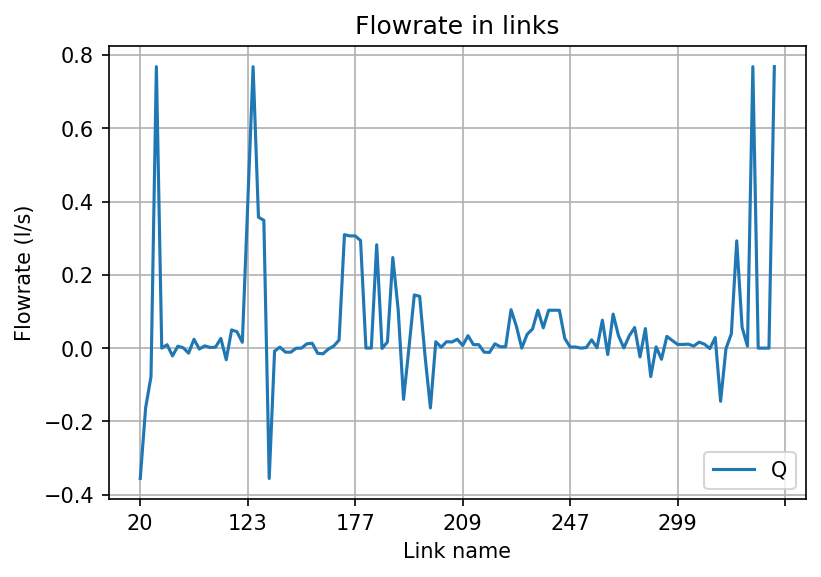

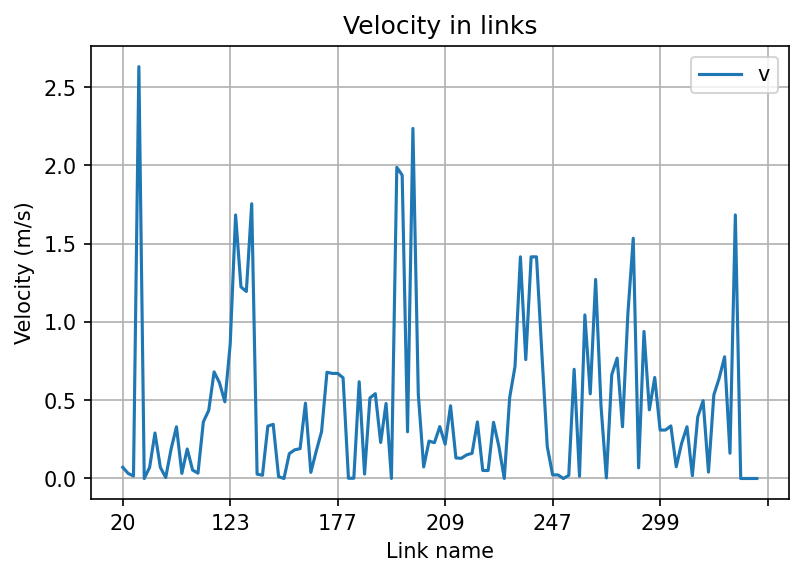

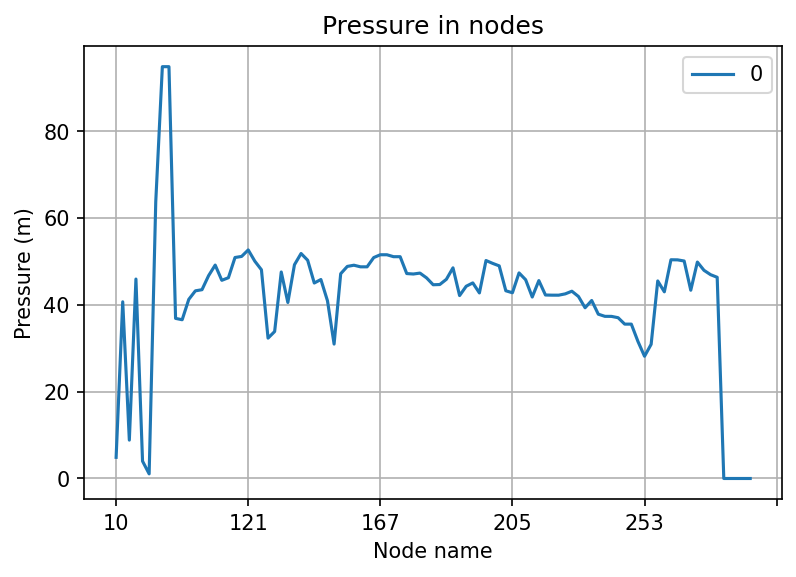

In [50]:
# Flowrate plot
flowrate.T.plot()
plt.ylabel('Flowrate (l/s)')
plt.xlabel('Link name')
plt.legend(labels='Q')
plt.title('Flowrate in links')
plt.grid()

# Velocity plot
velocity.T.plot()
plt.ylabel('Velocity (m/s)')
plt.xlabel('Link name')
plt.legend(labels='v')
plt.title('Velocity in links')
plt.grid()

# Pressure plot
pressure.T.plot()
plt.ylabel('Pressure (m)')
plt.xlabel('Node name')
plt.title('Pressure in nodes')
plt.grid()

<AxesSubplot:>

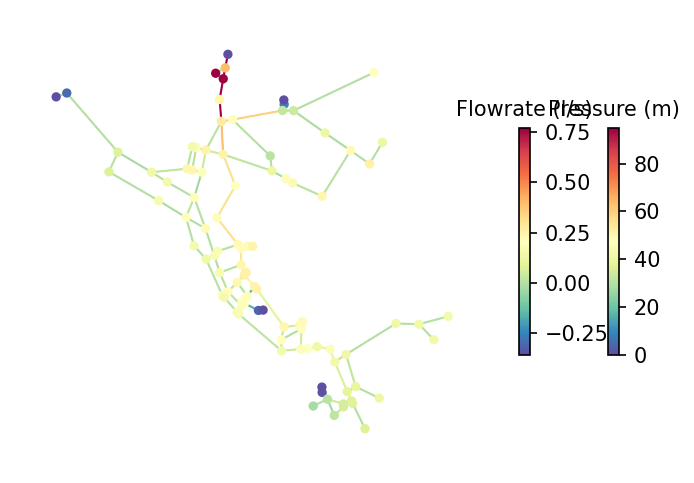

In [51]:
# Extracting the flowrate and pressure from the results
# To use in the plot.
flowrate = results.link['flowrate'].loc[0,:]
pressure = results.node['pressure'].loc[0,:]


# Plot of the network, pressure at nodes and flowrate in links
wntr.graphics.plot_network(wn, node_attribute=pressure,
                           link_attribute=flowrate,
                           node_colorbar_label='Pressure (m)',
                           link_colorbar_label='Flowrate (l/s)')

## Task 4 Change attributes

### Task 4a: Change dimension of some pipes

In [52]:
links_under = wn.query_link_attribute('diameter', np.less, 350, link_type=wntr.network.model.Pipe)
print(len(links_under), 'pipes has a dimension less than 350 mm')


for pipe_name, pipe in wn.pipes():
    if 0 < pipe.diameter <= 0.35:
        pipe.diameter = 0.35
    else:
        pass


links_under = wn.query_link_attribute('diameter', np.less, 350, link_type=wntr.network.model.Pipe)
print(f'After the change, {len(links_under)} pipes has a dimension less than 350 mm')

117 pipes has a dimension less than 350 mm
After the change, 117 pipes has a dimension less than 350 mm


### Task 4b: Change initial status

In [53]:
for pipe_name, pipe in wn.pipes():
    test = str(pipe.status)
    if test == 'Closed':
        closed_pipe = pipe
        print(f'The pipe named "{closed_pipe}" is closed')

# Task 4b, Alternative method
# closed_pipes = wn.query_link_attribute('status', np.equal, 0, link_type=wntr.network.model.Pipe)
# for element in closed_pipes.index:
#     print(f'The pipe named "{element}" is closed')
        

closed_pipe.initial_status = 'Opened'
print(f'The pipe is now "{closed_pipe.initial_status}"')

pump = wn.get_link(335)
pump.initial_status = 'Closed'
print(f'The pump is now "{pump.initial_status}"')

The pipe named "330" is closed
The pipe is now "Open"
The pump is now "Closed"


### Task 4c: Run steady-state simulations with changed attributes

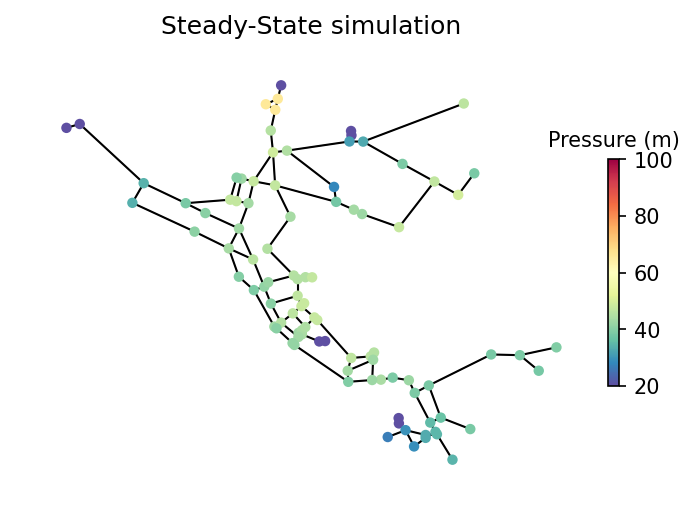

In [64]:
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
pressure = results.node['pressure'].loc[0,:]

wntr.graphics.plot_network(wn, node_attribute=pressure,
                           title='Steady-State simulation',
                           node_size=25,
                           node_range=[20, 100],
                           node_colorbar_label='Pressure (m)');
                    

## Task 5 Change and add patterns

### Task 5a: change the added pattern

In [33]:
patterns_network = wn.pattern_name_list
print(f'We got {len(patterns_network)} pattern with the name {patterns_network}')

pattern = wn.patterns.get('1')
pattern_multiplier = [0.25, 0.50, 0.75, 1.75, 1.5, 1.25, 
                      1, 1.25, 2, 1.50, 1.25, 0.75]
print(len(pattern_multiplier))
pattern.multipliers = pattern_multiplier

wn.patterns.get('1')

We got 1 pattern with the name ['1']
12


<Pattern '1', multipliers=array([0.25, 0.5 , 0.75, 1.75, 1.5 , 1.25, 1.  , 1.25, 2.  , 1.5 , 1.25, 0.75])>

### Task 5b: Adding timesteps and simulate

In [34]:
# Changing the timesteps
wn.options.time.report_timestep = 3600 * 2
wn.options.time.pattern_timestep = 3600 * 2
wn.options.time.duration = 3600 * 24

# Setting the hydraulic demand model
wn.options.hydraulic.demand_model = 'DDA'

sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

### Task 5c: Showing results from the simulation

In [35]:
# Pressure results
sim_pressure = results.node['pressure']
sim_pressure.index = sim_pressure.index / 3600
display(sim_pressure)

# Demand results
sim_demand = results.node['demand']
sim_demand.index = sim_demand.index / 3600
display(sim_demand)

name,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,River,Lake,1,2,3
0.0,2.950164,38.601555,8.839210,43.241077,3.992894,1.066812,65.732483,65.732117,65.731758,34.954163,...,40.911198,47.172523,45.247955,44.189674,43.576565,8.662937e-15,0.0,0.0,0.0,0.0
2.0,2.604129,38.509853,8.839205,42.997864,3.992894,1.066809,65.721687,65.721329,65.720963,34.608128,...,40.663765,46.923618,45.003342,43.920784,43.307758,8.662937e-15,0.0,0.0,0.0,0.0
4.0,2.272112,38.421593,8.839205,42.761570,3.992894,1.066809,65.712082,65.711716,65.711342,34.276112,...,40.419621,46.681137,44.765724,43.658581,43.045650,8.662937e-15,0.0,0.0,0.0,0.0
6.0,1.029505,38.178043,8.839200,41.960476,3.992889,1.066807,65.692017,65.691643,65.691269,33.033504,...,39.559551,45.854942,43.960594,42.747993,42.135632,8.662937e-15,0.0,0.0,0.0,0.0
8.0,1.331905,38.232944,8.839200,42.143730,3.992889,1.066807,65.694778,65.694405,65.694031,33.335903,...,39.761536,46.044449,44.144695,42.959354,42.346832,8.662937e-15,0.0,0.0,0.0,0.0
10.0,1.629905,38.278015,8.839200,42.328224,3.992889,1.066807,65.697998,65.697624,65.697258,33.633904,...,39.961433,46.234932,44.330063,43.171791,42.559120,8.662937e-15,0.0,0.0,0.0,0.0
12.0,1.945165,38.341698,8.839200,42.535385,3.992894,1.066809,65.703918,65.703545,65.703178,33.949165,...,40.182201,46.448452,44.538296,43.406033,42.793221,8.662937e-15,0.0,0.0,0.0,0.0
14.0,1.629905,38.278015,8.839200,42.328224,3.992889,1.066807,65.697998,65.697624,65.697258,33.633904,...,39.961433,46.234932,44.330063,43.171791,42.559120,8.662937e-15,0.0,0.0,0.0,0.0
16.0,0.700343,38.102280,8.839195,41.756828,3.992889,1.066805,65.687202,65.686821,65.686455,32.704342,...,39.332016,45.644051,43.755920,42.516865,41.904678,8.662937e-15,0.0,0.0,0.0,0.0
18.0,1.331905,38.232944,8.839200,42.143730,3.992889,1.066807,65.694778,65.694405,65.694031,33.335903,...,39.761536,46.044449,44.144695,42.959358,42.346832,8.662937e-15,0.0,0.0,0.0,0.0


name,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,River,Lake,1,2,3
0.0,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.002996,...,0.0,0.0,0.0,0.0,0.0,-0.466900,0.0,0.164560,0.138165,0.121368
2.0,0.0,0.0,0.0,0.000032,0.0,0.0,0.0,0.0,0.0,0.005992,...,0.0,0.0,0.0,0.0,0.0,-0.468951,0.0,0.156766,0.131513,0.095058
4.0,0.0,0.0,0.0,0.000047,0.0,0.0,0.0,0.0,0.0,0.008988,...,0.0,0.0,0.0,0.0,0.0,-0.470773,0.0,0.148859,0.124844,0.068648
6.0,0.0,0.0,0.0,0.000110,0.0,0.0,0.0,0.0,0.0,0.020972,...,0.0,0.0,0.0,0.0,0.0,-0.474555,0.0,0.118776,0.098574,-0.042444
8.0,0.0,0.0,0.0,0.000095,0.0,0.0,0.0,0.0,0.0,0.017976,...,0.0,0.0,0.0,0.0,0.0,-0.474036,0.0,0.126205,0.105115,-0.014126
10.0,0.0,0.0,0.0,0.000079,0.0,0.0,0.0,0.0,0.0,0.014980,...,0.0,0.0,0.0,0.0,0.0,-0.473429,0.0,0.133322,0.111595,0.014477
12.0,0.0,0.0,0.0,0.000063,0.0,0.0,0.0,0.0,0.0,0.011984,...,0.0,0.0,0.0,0.0,0.0,-0.472314,0.0,0.140936,0.118182,0.041969
14.0,0.0,0.0,0.0,0.000079,0.0,0.0,0.0,0.0,0.0,0.014980,...,0.0,0.0,0.0,0.0,0.0,-0.473429,0.0,0.133322,0.111595,0.014477
16.0,0.0,0.0,0.0,0.000126,0.0,0.0,0.0,0.0,0.0,0.023968,...,0.0,0.0,0.0,0.0,0.0,-0.475459,0.0,0.110034,0.091794,-0.068825
18.0,0.0,0.0,0.0,0.000095,0.0,0.0,0.0,0.0,0.0,0.017976,...,0.0,0.0,0.0,0.0,0.0,-0.474036,0.0,0.126205,0.105115,-0.014126


Text(0.5, 1.0, 'Simulated pressure at node 101')

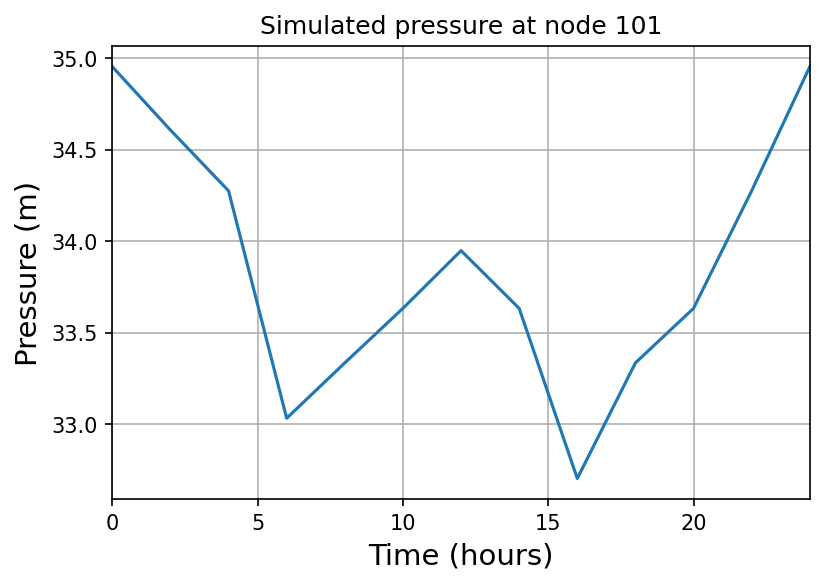

In [36]:
# Using node 101 further in the proposed solution

# Plotting the pressure for node 101
sim_pressure['101'].plot()
plt.grid()
plt.xlabel('Time (hours)', fontsize=14)
plt.ylabel('Pressure (m)', fontsize=14)
plt.xlim(0, 24)
plt.title('Simulated pressure at node 101')

Text(0.5, 1.0, 'Simulated demand at node 101')

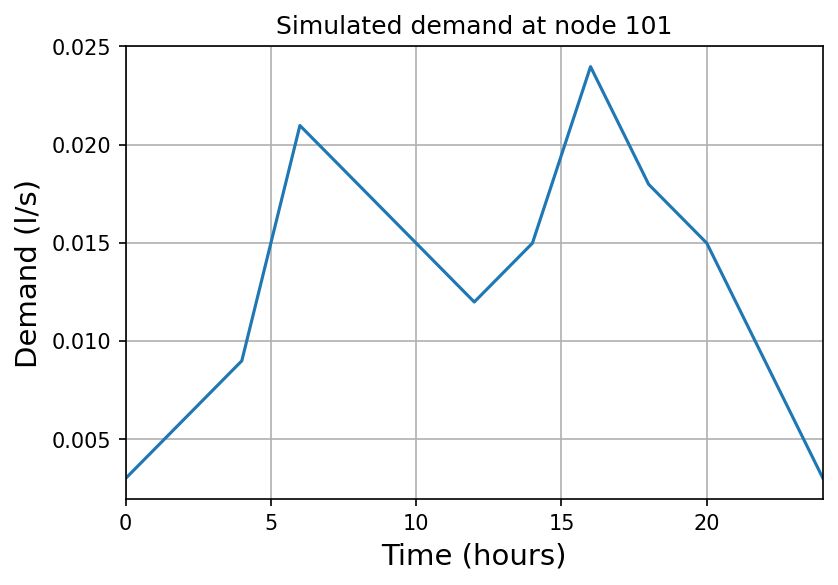

In [37]:
# Plotting the demand for node 101
sim_demand['101'].plot()
plt.grid()
plt.xlabel('Time (hours)', fontsize=14)
plt.ylabel('Demand (l/s)', fontsize=14)
plt.xlim(0, 24)
plt.title('Simulated demand at node 101')

## Task 6 Creating a network from scratch

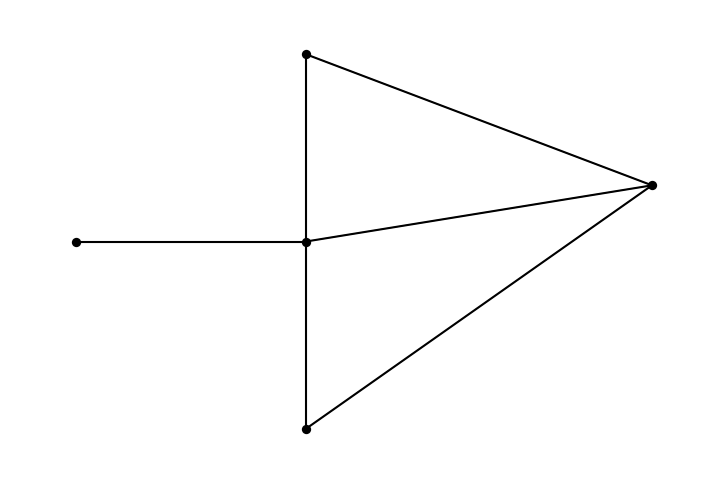

In [38]:
wn = wntr.network.WaterNetworkModel()

# Patterns
wn.add_pattern('pat1', [1])
wn.add_pattern('pat2', [1,2,3,4,5,6,7,8,9,10])


# Junctions
wn.add_junction('node1', base_demand=1, demand_pattern='pat1', elevation=50, coordinates=(1,2))
wn.add_junction('node2', base_demand=1, demand_pattern='pat1', elevation=42, coordinates=(1,3))
wn.add_junction('node3', base_demand=1, demand_pattern='pat1', elevation=37, coordinates=(1,1))
wn.add_junction('node4', base_demand=1, demand_pattern='pat2', elevation=38, coordinates=(2.5,2.3))


# Reservoirs
wn.add_reservoir('res', base_head=125, head_pattern='pat1', coordinates=(0,2))


# Pipes
wn.add_pipe('pipe0', 'node1', 'res', length=100, diameter=0.3, roughness=100, minor_loss=0.0, initial_status='OPEN')
wn.add_pipe('pipe1', 'node1', 'node2', length=200, diameter=0.3, roughness=100, minor_loss=0.0, initial_status='OPEN')
wn.add_pipe('pipe2', 'node2', 'node4', length=400, diameter=0.3, roughness=100, minor_loss=0.0, initial_status='OPEN')
wn.add_pipe('pipe3', 'node4', 'node3', length=400, diameter=0.3, roughness=100, minor_loss=0.0, initial_status='OPEN')
wn.add_pipe('pipe4', 'node1', 'node3', length=200, diameter=0.3, roughness=100, minor_loss=0.0, initial_status='OPEN')
wn.add_pipe('pipe5', 'node1', 'node4', length=300, diameter=0.3, roughness=100, minor_loss=0.0, initial_status='CLOSED')


wntr.graphics.plot_network(wn)

wn.write_inpfile('network_from_cratch.inp', units='LPS', version=2.2) 